# NLP Herramientas
- Analizar titulos similares y relacionarlo con views
- Buscar palabras similares a una ingresada y ordenarla segun los trends de google
- Mostrar categorias a las que pertenece un titulo
- Mostrar la aceptacion para las categorias reconocidas

In [1]:
# Datos de enntrenamiento NLP Titulos
import pandas as pd
df = pd.read_csv('video_data_final.csv')
df.head()

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,...,duration,definition,caption,pushblishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titleLength,title_no_stopwords
0,0,uCqLtZhf8xw,ElTrollino,¡PASAMOS de TIENDA de MASCOTAS NOOB a TIENDA d...,Vídeo en español de Roblox Tycoon donde pasamo...,['roblox'],2022-07-28T18:15:03Z,819935.0,35640.0,NaN,...,PT15M25S,hd,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,xkQKH6-uNyE,ElTrollino,¡HACKER NOS ENCIERRA EN LA PRISIÓN DE BEDROCK!...,El hacker nos encierra en la prisión más segur...,['minecraft'],2022-06-18T20:45:18Z,3900502.0,112102.0,NaN,...,PT22M19S,hd,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,MWNpBHATT-w,ElTrollino,¡NO ENCUENTRO a LYNA en el LABERINTO! 😱 JUGAMO...,Vlog de Paris y Disney Land donde jugamos al e...,['escondite'],2022-06-10T18:54:53Z,2827316.0,77892.0,NaN,...,PT13M23S,hd,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6Qg_FpyPY-Y,ElTrollino,¡PASAMOS de GRANJA NOOB a GRANJA PRO en ROBLOX...,Vídeo en español de Farm life Tycoon donde pas...,['roblox'],2022-06-04T18:20:42Z,2692418.0,80655.0,NaN,...,PT12M47S,hd,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,IgNj4zJ-Tv0,ElTrollino,¡Me ESCONDO DENTRO de una MESA DE CRAFTEO! 😂 E...,"El escondite en minecraft con mods, me escondo...",['minecraft'],2022-05-28T18:00:16Z,4171162.0,196737.0,NaN,...,PT12M22S,hd,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Datos de entrenamiento NLP
import spacy
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

spacy.prefer_gpu()
nlp = spacy.load('es_core_news_md')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\qsavy_1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\qsavy_1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
stops = set(stopwords.words('spanish'))
len(stops)

313

In [4]:
title = df['title']
stop_words = set(stopwords.words('spanish'))
df['title_no_stopwords'] = df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])
df['title_no_stopwords'] = df['title'].str.replace('\n','')
df['title_no_stopwords'] = df['title'].str.replace('\w*\d\w*', '')
df['title_no_stopwords'] = df['title'].str.replace('[''""_]','')
df['title_no_stopwords'] = df['title'].str.replace('[^\w\s]','')
df['title_no_stopwords'] = df['title'].str.replace('[[]]','')
df['title_no_stopwords'] = df['title'].str.replace('\d*,\d','')
df['title_no_stopwords'] = df['title'].str.replace('\d*,','')

C:\Users\qsavy_1\AppData\Local\Temp\ipykernel_16636\3557328382.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title_no_stopwords'] = df['title'].str.replace('\w*\d\w*', '')
C:\Users\qsavy_1\AppData\Local\Temp\ipykernel_16636\3557328382.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title_no_stopwords'] = df['title'].str.replace('[''""_]','')
C:\Users\qsavy_1\AppData\Local\Temp\ipykernel_16636\3557328382.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title_no_stopwords'] = df['title'].str.replace('[^\w\s]','')
C:\Users\qsavy_1\AppData\Local\Temp\ipykernel_16636\3557328382.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title_no_stopwords'] = df['title'].str.replace('[[]]','')
C:\Users\qsavy_1\.conda\envs\scraper\lib\site-packages\pandas\core\strings\object

In [5]:
title = df['title']
title_list = title.values.tolist()
all_words_str = ' '.join(title_list)
all_words_str

'¡PASAMOS de TIENDA de MASCOTAS NOOB a TIENDA de MASCOTAS PRO en ROBLOX! 🐶😻 (Pet Store Tycoon) ¡HACKER NOS ENCIERRA EN LA PRISIÓN DE BEDROCK! 😱 ¿ESCAPAREMOS DE LA PRISIÓN MÁS SEGURA DE MINECRAFT? ¡NO ENCUENTRO a LYNA en el LABERINTO! 😱 JUGAMOS al ESCONDITE en DISNEY LAND PARIS en la VIDA REAL ¡PASAMOS de GRANJA NOOB a GRANJA PRO en ROBLOX! 🚜😱 GASTO +40.000 ROBUX 😭 (Farm Life Tycoon) ¡Me ESCONDO DENTRO de una MESA DE CRAFTEO! 😂 ESCONDITE EXTREMO en MINECRAFT con MODS ¡NADIE ENCUENTRA A TROLLINO ESCONDIDO EN EL CUBO DE LA BASURA! 🙈😂 EL ESCONDITE CON LOS COMPAS Nos ponemos GORDITOS en la CENA más cara de LOS COMPAS en la VIDA REAL!! ¡Uso cámaras de seguridad para hacer TRAMPAS en el Escondite de Minecraft! 😂 ¡SOBREVIVE a la MEGA RAMPA TROLL en GTA 5! 😱 Cara a Cara en GTA 5 con Los Compas MIKELLINO GIGANTE vs LOS COMPAS ENANOS 😂 Roblox Obby DESAFÍO de LUCKY BLOCKS de POPPY PLAYTIME vs SIREN HEAD 😱 ¿CUÁL ES MEJOR? 😂 MINECRAFT MODS Uso HACKS en el Escondite con los Compas 😂 TROLLINO es HACKE

In [6]:
# Entrenamiento del modelo neurolinguistico
doc = nlp(all_words_str)

In [7]:
# Test de sentencias
print (list(doc.sents)[9])

🍔🍟 (McDonalds Roblox Tycoon) ¡TROLLINO lleva a MIKECRACK de COMPRAS a la TIENDA de MASCOTAS en PK XD! 🛒😂 ¡¡LA FÁBRICA DE SPIDERMAN EN ROBLOX!! 🕷️🕸️ Super Hero Tycoon ¡HAY UN ASESINO en la PRISIÓN!


In [8]:
# Prueba de palabras similares para el modelo neurolinguistico
your_word = 'amlo'

ms = nlp.vocab.vectors.most_similar(np.asarray([nlp.vocab.vectors[nlp.vocab.strings[your_word]]]), n=50)
words = [nlp.vocab.strings[w] for w in ms[0][0]]
distances = ms[2]
print(words)

['1×10', 'veya', 'Obradors', 'panier', 'Fócil', '@JoseAMeadeK', 'Ebrad', 'Morenica', 'ten\xadden\xadcia', 'Trump–', 'Niet', 'Pichet', 'APRAMP', '@SSP_CDMX', 'Ibama', 'GSLP', 'Dircema', '16J', 'tiñera', 'Hutin', 'Mugilogobius', 'bifilar', 'elections', 'cicatero', 'copeyano', 'Dilecto', 'RyR', 'datu', 'LNT', 'AEVAL', 'Ozuluama', 'RTH', 'Cambiemos-', 'liberal-demócratas', 'Hinz', 'SIDUE', 'Stolt', 'Candidates', 'Toluca-Naucalpan', 'boris', 'Votante', 'monclova', 'hillary', 'semipresidencial', 'PSOE-A.', 'AristeguiEnVivo', 'UNACE', '15-O', 'menemato', 'ppsoe']


In [9]:
# Lista de tokens
for token in doc[:10]:
    print (token)

¡
PASAMOS
de
TIENDA
de
MASCOTAS
NOOB
a
TIENDA
de


In [10]:
doc[0:10]

¡PASAMOS de TIENDA de MASCOTAS NOOB a TIENDA de

In [11]:
type(doc.sents)

generator

In [12]:
title = df['title'][0]
title

'¡PASAMOS de TIENDA de MASCOTAS NOOB a TIENDA de MASCOTAS PRO en ROBLOX! 🐶😻 (Pet Store Tycoon)'

In [13]:
doc2 = nlp(title)

In [14]:
doc2[0:-1]

¡PASAMOS de TIENDA de MASCOTAS NOOB a TIENDA de MASCOTAS PRO en ROBLOX! 🐶😻 (Pet Store Tycoon

In [15]:
for ent in doc2.ents:
    print (ent.text, ent.label_)

TIENDA ORG
TIENDA ORG
MASCOTAS PRO PER
ROBLOX! 🐶😻 MISC
Pet Store Tycoon MISC


In [16]:
from spacy import displacy
displacy.render(doc, style='ent')

In [17]:
token2 = list(doc2.sents)[0]
token2

¡PASAMOS de TIENDA de MASCOTAS NOOB a TIENDA de MASCOTAS PRO en ROBLOX! 🐶😻 (Pet Store Tycoon)

In [18]:
def compare_title(input_title,row_title,index = 0):
    input_doc = nlp(input_title)
    #ompare_doc = nlp(df['title'][index])
    compare_doc = nlp(row_title)
    return input_doc.similarity(compare_doc)

In [27]:
' print(compare_title('Titulo de prueba', 4))'

ValueError: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'int'>

In [ ]:
# Clonar el dataframe con los titulos
# Crear una columna para la evaluacion de la funcion
# Ordenar de mayor a menor
# Listar los top 10 titulos

In [20]:
df_titles = df[['title', 'viewCount']]
df_titles.head()

,title,viewCount
0,¡PASAMOS de TIENDA de MASCOTAS NOOB a TIENDA d...,819935.0
1,¡HACKER NOS ENCIERRA EN LA PRISIÓN DE BEDROCK!...,3900502.0
2,¡NO ENCUENTRO a LYNA en el LABERINTO! 😱 JUGAMO...,2827316.0
3,¡PASAMOS de GRANJA NOOB a GRANJA PRO en ROBLOX...,2692418.0
4,¡Me ESCONDO DENTRO de una MESA DE CRAFTEO! 😂 E...,4171162.0


In [21]:
input_text = 'primera vista del trailer top gun 2'
df_titles['compare'] = df_titles.apply(lambda row: compare_title(input_text,row.title),axis=1)

C:\Users\qsavy_1\AppData\Local\Temp\ipykernel_16636\3549386062.py:5: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return input_doc.similarity(compare_doc)
C:\Users\qsavy_1\AppData\Local\Temp\ipykernel_16636\2554481336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titles['compare'] = df_titles.apply(lambda row: compare_title(input_text,row.title),axis=1)


In [22]:
df_titles.head(50)

,title,viewCount,compare
0,¡PASAMOS de TIENDA de MASCOTAS NOOB a TIENDA d...,819935.0,0.171095
1,¡HACKER NOS ENCIERRA EN LA PRISIÓN DE BEDROCK!...,3900502.0,-0.045410
2,¡NO ENCUENTRO a LYNA en el LABERINTO! 😱 JUGAMO...,2827316.0,0.025663
3,¡PASAMOS de GRANJA NOOB a GRANJA PRO en ROBLOX...,2692418.0,0.151640
4,¡Me ESCONDO DENTRO de una MESA DE CRAFTEO! 😂 E...,4171162.0,0.035285
5,¡NADIE ENCUENTRA A TROLLINO ESCONDIDO EN EL CU...,4007187.0,-0.008368
6,Nos ponemos GORDITOS en la CENA más cara de LO...,2521662.0,0.040818
7,¡Uso cámaras de seguridad para hacer TRAMPAS e...,7614516.0,0.163769
8,¡SOBREVIVE a la MEGA RAMPA TROLL en GTA 5! 😱 C...,9307456.0,0.275552
9,MIKELLINO GIGANTE vs LOS COMPAS ENANOS 😂 Roblo...,9968384.0,0.131418


In [23]:
df_titles.sort_values(by='compare', ascending=[False])

,title,viewCount,compare
1503,Episodio 2 Temporada 3,101325.0,0.643008
1502,Episodio 3 Temporada 3,67483.0,0.634814
278,10 Cosas Aterradoras Captadas en Minecraft #2,102839.0,0.622931
1500,Episodio 6 Temporada 3,102891.0,0.610238
1498,Episodio 8 Temporada 3,132870.0,0.605008
...,...,...,...
1896,Vengan a bailar,22518.0,-0.233454
579,Mi cita me dijo que olía a chicharrón y le doy...,699913.0,-0.244465
1711,Nadie va a entender jajaja,366621.0,-0.245648
1909,¿Qué le podemos decir a la banda?,86750.0,-0.245835


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\qsavy_1\.conda\envs\scraper\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128074 (\N{FISTED HAND SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qsavy_1\.conda\envs\scraper\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129317 (\N{LYING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qsavy_1\.conda\envs\scraper\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127874 (\N{BIRTHDAY CAKE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qsavy_1\.conda\envs\scraper\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qsavy_1\.conda\envs\scraper\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.pri

C:\Users\qsavy_1\.conda\envs\scraper\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qsavy_1\.conda\envs\scraper\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128584 (\N{SEE-NO-EVIL MONKEY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qsavy_1\.conda\envs\scraper\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127873 (\N{WRAPPED PRESENT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qsavy_1\.conda\envs\scraper\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127877 (\N{FATHER CHRISTMAS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qsavy_1\.conda\envs\scraper\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127876 (\N{CHRISTMAS TREE}) missing from current font.
  fig.canvas.print_figure

C:\Users\qsavy_1\.conda\envs\scraper\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128138 (\N{PILL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qsavy_1\.conda\envs\scraper\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129459 (\N{EMOJI COMPONENT WHITE HAIR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qsavy_1\.conda\envs\scraper\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qsavy_1\.conda\envs\scraper\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qsavy_1\.conda\envs\scraper\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from c

C:\Users\qsavy_1\.conda\envs\scraper\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127965 (\N{DESERT ISLAND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qsavy_1\.conda\envs\scraper\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128000 (\N{RAT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qsavy_1\.conda\envs\scraper\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127469 (\N{REGIONAL INDICATOR SYMBOL LETTER H}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qsavy_1\.conda\envs\scraper\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qsavy_1\.conda\envs\scraper\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128586 (\N{SPEAK-NO-EVIL MONKEY}) missing from current font.
  fig.canvas.p

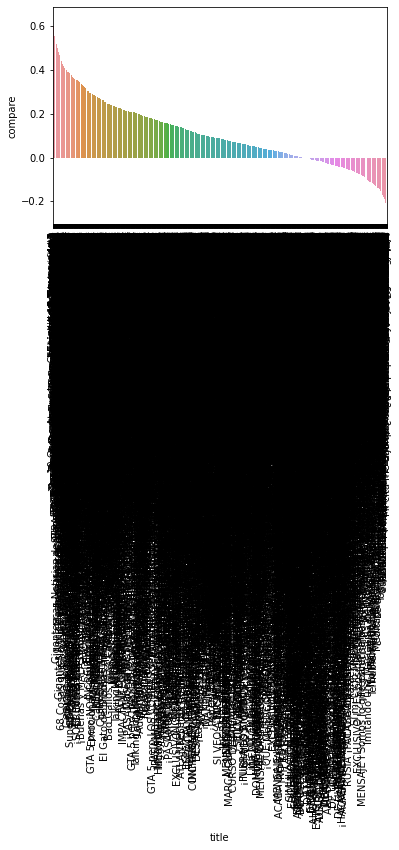

In [25]:
ax = sns.barplot(x='title', y='compare', data=df_titles.sort_values(by='compare', ascending=[False]))
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
### Get video statistics for all the channels
#plt.savefig('channel_stats_views_final.pdf')